In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import random
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('../input/')

['test.csv',
 'test_images',
 'train.csv',
 'sample_submission.csv',
 'train_images']

In [3]:
base_dir = '../input/'
train_dir = os.path.join(base_dir, 'train_images/')
train = pd.read_csv(os.path.join(base_dir, 'train.csv'))
train['path'] = train['id_code'].map(lambda x: os.path.join(train_dir, '{}.png'.format(x)))
train = train.drop(columns = ['id_code'])
train = train.sample(frac=1).reset_index(drop=True) #shuffle dataframe

test_dir = os.path.join(base_dir, 'test_images/')
test = pd.read_csv(os.path.join(base_dir, 'test.csv'))
test['path'] = test['id_code'].map(lambda x: os.path.join(test_dir, '{}.png'.format(x)))
test = test.drop(columns = ['id_code'])
test = test.sample(frac=1).reset_index(drop=True) #shuffle dataframe


In [4]:
print("size of train set: {}".format(len(train)))
print("size of test set: {}".format(len(test)))

size of train set: 3662
size of test set: 1928


In [5]:
train.head()

diagnosis                                    path
0          2  ../input/train_images/c6a2975228af.png
1          0  ../input/train_images/0daddc45d832.png
2          2  ../input/train_images/b187b3c93afb.png
3          3  ../input/train_images/e93394175a19.png
4          0  ../input/train_images/2d04cead4d3a.png

In [6]:
test.head()

path
0  ../input/test_images/13a444b80681.png
1  ../input/test_images/93c1af8b625c.png
2  ../input/test_images/9aaf74b298c2.png
3  ../input/test_images/6f8a7b6b30c2.png
4  ../input/test_images/7b03611c6d88.png

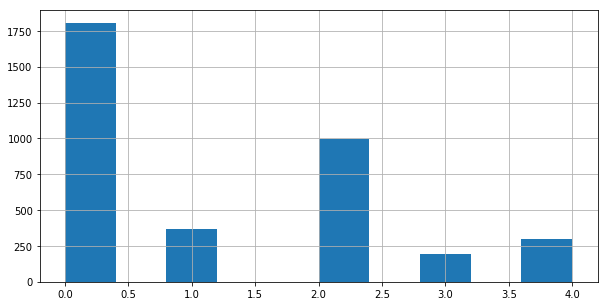

In [7]:
train['diagnosis'].hist(figsize=(10,5), bins=10)

we can see that a lot of train images are in class 0 

In [8]:
train_width, train_height = [], []
for i in range(len(train)):
    image = Image.open(train['path'][i])
    width, height = image.size
    train_width.append(width)
    train_height.append(height)
    
test_width, test_height = [], []
for i in range(len(test)):
    image = Image.open(test['path'][i])
    width, height = image.size
    test_width.append(width)
    test_height.append(height)

In [9]:
train['width'] = train_width
train['height'] = train_height
test['width'] = test_width
test['height'] = test_height

In [10]:
for df in [train, test]:
    df['width_height_ratio'] = df['height'] / df['width']
    df['width_height_added'] = df['height'] + df['width']

In [11]:
train.head()

diagnosis        ...         width_height_added
0          2        ...                       4546
1          0        ...                       2100
2          2        ...                       2504
3          3        ...                       5352
4          0        ...                       3584

[5 rows x 6 columns]

In [12]:
test.head()

path         ...          width_height_added
0  ../input/test_images/13a444b80681.png         ...                        1120
1  ../input/test_images/93c1af8b625c.png         ...                        1120
2  ../input/test_images/9aaf74b298c2.png         ...                        1120
3  ../input/test_images/6f8a7b6b30c2.png         ...                        1120
4  ../input/test_images/7b03611c6d88.png         ...                        1120

[5 rows x 5 columns]

Text(0.5, 1.0, 'test width height ratio')

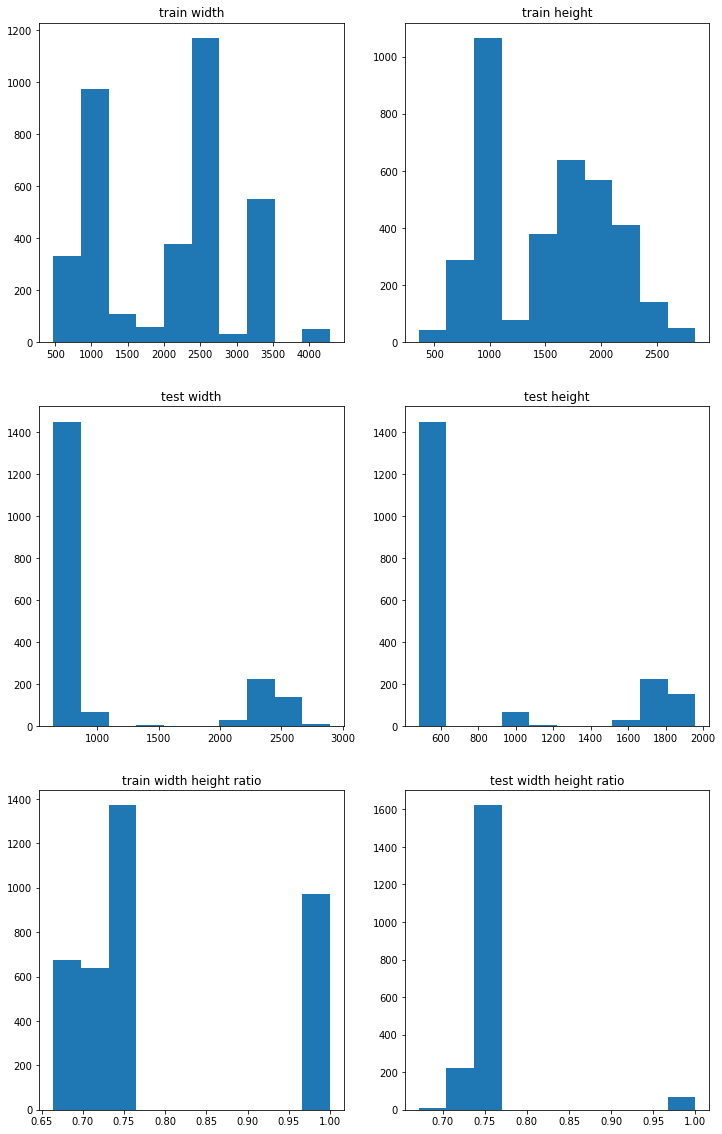

In [13]:
fig = plt.figure(figsize=(12,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.hist(train['width'])
ax1.set_title("train width")

ax3.hist(test['width'])
ax3.set_title("test width")

ax2.hist(train['height'])
ax2.set_title("train height")

ax4.hist(test['height'])
ax4.set_title("test height")

ax5.hist(train['width_height_ratio'])
ax5.set_title("train width height ratio")

ax6.hist(test['width_height_ratio'])
ax6.set_title("test width height ratio")

+ comparison of train image's width, height and test image's width, height
+ we can see the difference in the distribution

Text(0.5, 1.0, 'test width height added')

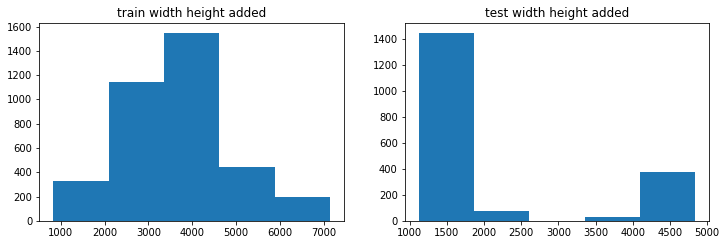

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.hist(train['width_height_added'], bins=5)
ax1.set_title("train width height added")

ax2.hist(test['width_height_added'], bins=5)
ax2.set_title("test width height added")

+ a lot images in the test set are very small compared to train set

In [15]:
train['width_height_added'].describe()

count    3662.000000
mean     3542.006827
std      1419.133265
min       832.000000
25%      2100.000000
50%      3584.000000
75%      4546.000000
max      7136.000000
Name: width_height_added, dtype: float64

In [16]:
test['width_height_added'].describe()

count    1928.000000
mean     1826.688278
std      1280.116549
min      1120.000000
25%      1120.000000
50%      1120.000000
75%      1433.000000
max      4840.000000
Name: width_height_added, dtype: float64

you can compare it with simple statistics

In [17]:
train.groupby(['diagnosis'])['width_height_added'].mean()

diagnosis
0    2640.090305
1    4256.110811
2    4450.339339
3    4431.564767
4    4506.861017
Name: width_height_added, dtype: float64

you can see that class 0 in train set have relatively small size of width and height

    # Visualinze Train Images

In [18]:
train_class0 = [] 
train_class1 = []
train_class2 = []
train_class3 = []
train_class4 = []

num_sample = 10

for path in train[train.diagnosis == 0].sample(num_sample)['path']:
    im = Image.open(path)
    train_class0.append(im)
    
for path in train[train.diagnosis == 1].sample(num_sample)['path']:
    im = Image.open(path)
    train_class1.append(im)
    
for path in train[train.diagnosis == 2].sample(num_sample)['path']:
    im = Image.open(path)
    train_class2.append(im)
    
for path in train[train.diagnosis == 3].sample(num_sample)['path']:
    im = Image.open(path)
    train_class3.append(im)
    
for path in train[train.diagnosis == 4].sample(num_sample)['path']:
    im = Image.open(path)
    train_class4.append(im)

## train class 0 (No DR)

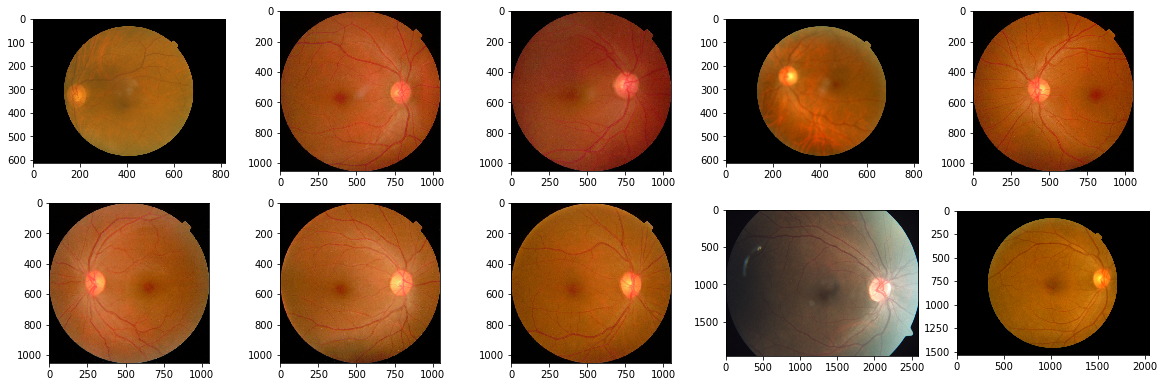

In [19]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class0):
    plt.subplot(len(train_class0) / columns + 1, columns, i + 1)
    plt.imshow(image)

## train class 1 (Mild)

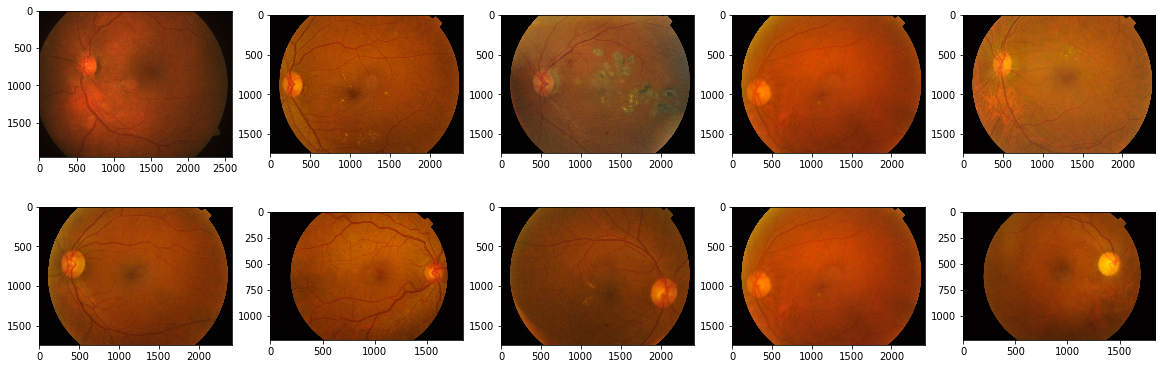

In [20]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class1):
    plt.subplot(len(train_class1) / columns + 1, columns, i + 1)
    plt.imshow(image)

## train class 2 (Moderate)

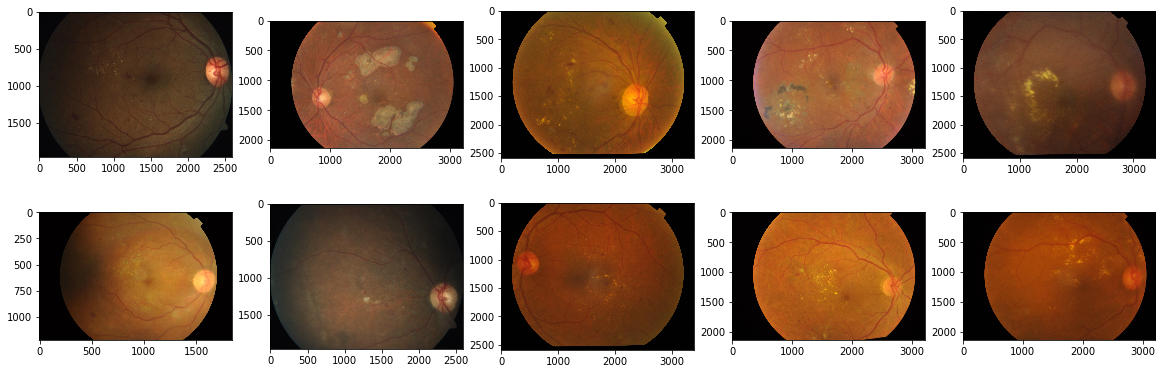

In [21]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class2):
    plt.subplot(len(train_class2) / columns + 1, columns, i + 1)
    plt.imshow(image)

## train class 3 (Severe)

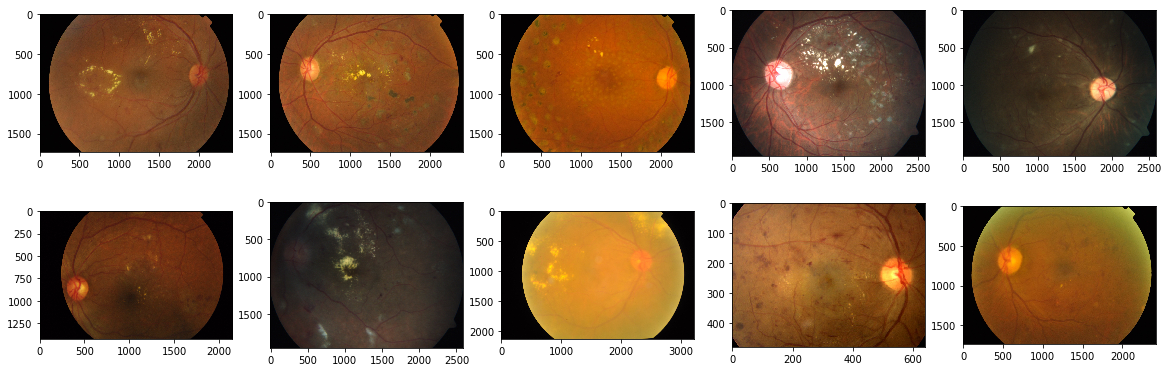

In [22]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class3):
    plt.subplot(len(train_class3) / columns + 1, columns, i + 1)
    plt.imshow(image)

## train class 4 (Proliferative DR)

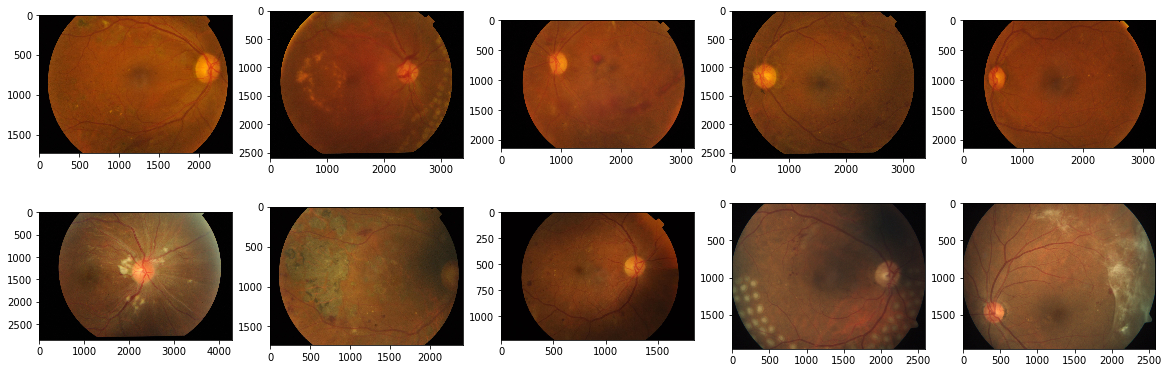

In [23]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class4):
    plt.subplot(len(train_class4) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Visualize Test Images

In [24]:
test.head()

path         ...          width_height_added
0  ../input/test_images/13a444b80681.png         ...                        1120
1  ../input/test_images/93c1af8b625c.png         ...                        1120
2  ../input/test_images/9aaf74b298c2.png         ...                        1120
3  ../input/test_images/6f8a7b6b30c2.png         ...                        1120
4  ../input/test_images/7b03611c6d88.png         ...                        1120

[5 rows x 5 columns]

In [25]:
test.describe()

width         ...          width_height_added
count  1928.000000         ...                 1928.000000
mean   1043.535788         ...                 1826.688278
std     740.511732         ...                 1280.116549
min     640.000000         ...                 1120.000000
25%     640.000000         ...                 1120.000000
50%     640.000000         ...                 1120.000000
75%     819.000000         ...                 1433.000000
max    2896.000000         ...                 4840.000000

[8 rows x 4 columns]

In [26]:
# width + height < 1500 => small image
# width + height > 4000 => large image

test_image_small = []
test_image_large = []

for path in test[test.width_height_added < 1500].sample(30)['path']:
    im = Image.open(path)
    test_image_small.append(im)
    
for path in test[test.width_height_added > 4000].sample(30)['path']:
    im = Image.open(path)
    test_image_large.append(im)

## test images (small size)

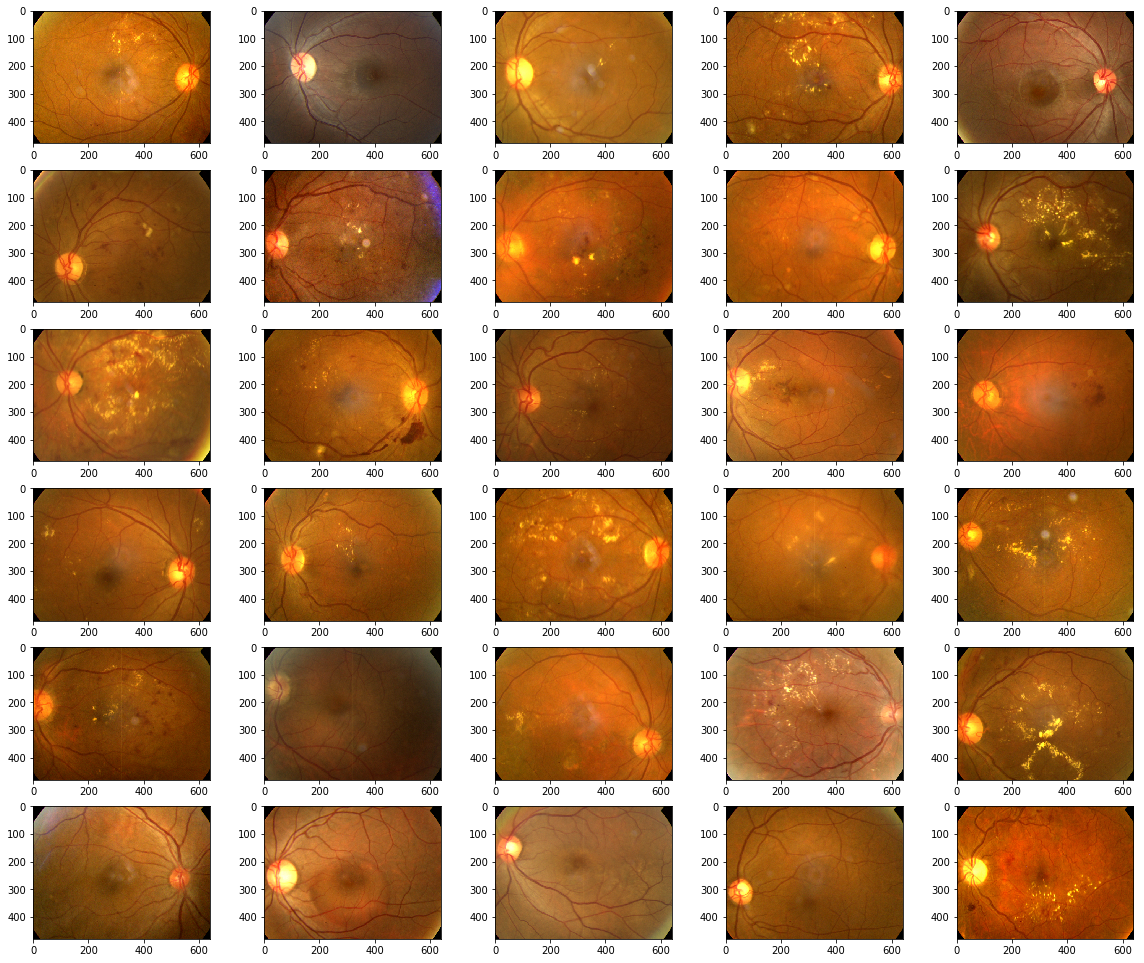

In [27]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(test_image_small):
    plt.subplot(len(test_image_small) / columns + 1, columns, i + 1)
    plt.imshow(image)

+ small size of test images have class of near to 4 (seeing with my eyes)
+ in the training set, class 0 were likely to be small image size. meaning **class distribution is very different in train and test set**

## test images (large size)

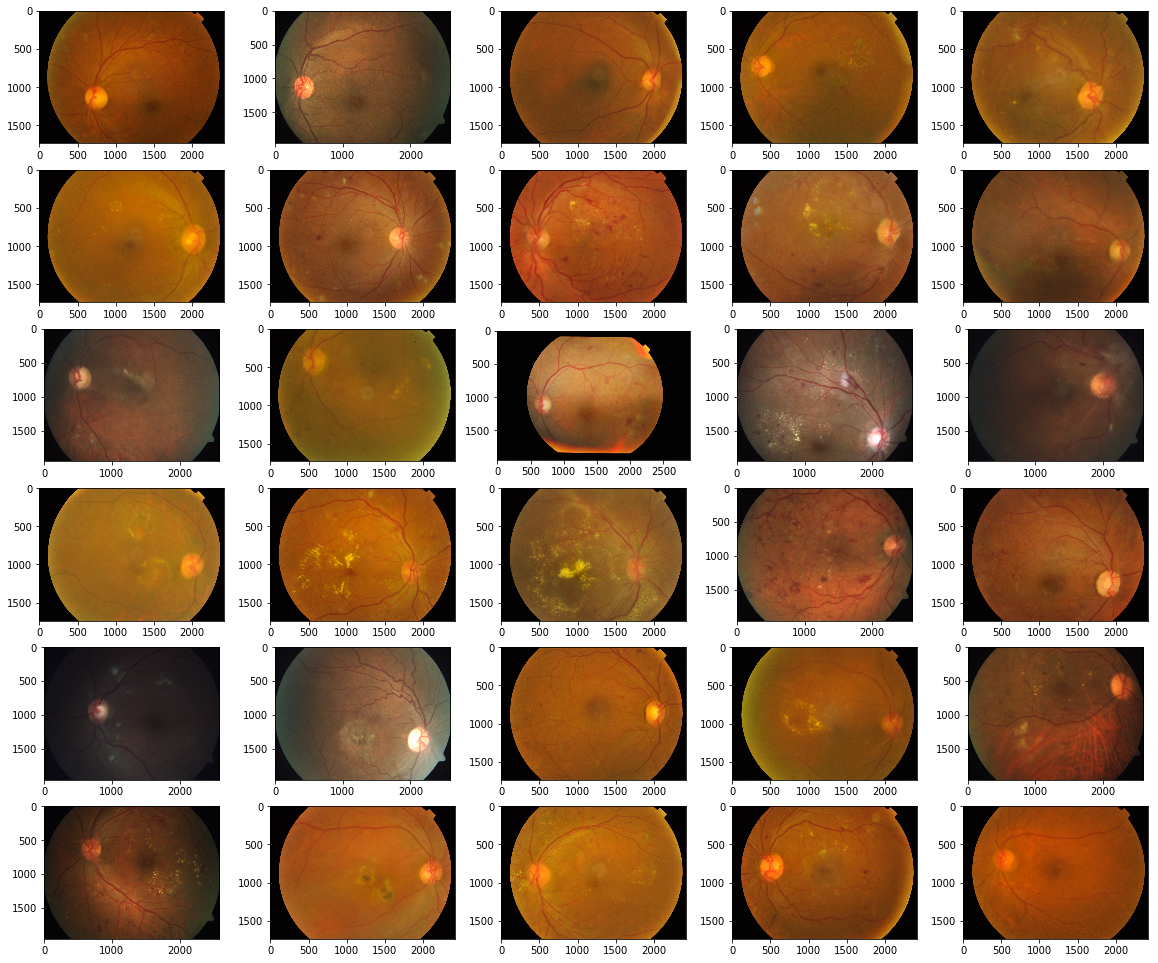

In [28]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(test_image_large):
    plt.subplot(len(test_image_large) / columns + 1, columns, i + 1)
    plt.imshow(image)

lets see the same thing for the train images

In [29]:
train_image_small = []
train_image_large = []

for path in train[train.width_height_added < 1500].sample(30)['path']:
    im = Image.open(path)
    train_image_small.append(im)
    
for path in train[train.width_height_added > 4000].sample(30)['path']:
    im = Image.open(path)
    train_image_large.append(im)

## train images (small size)

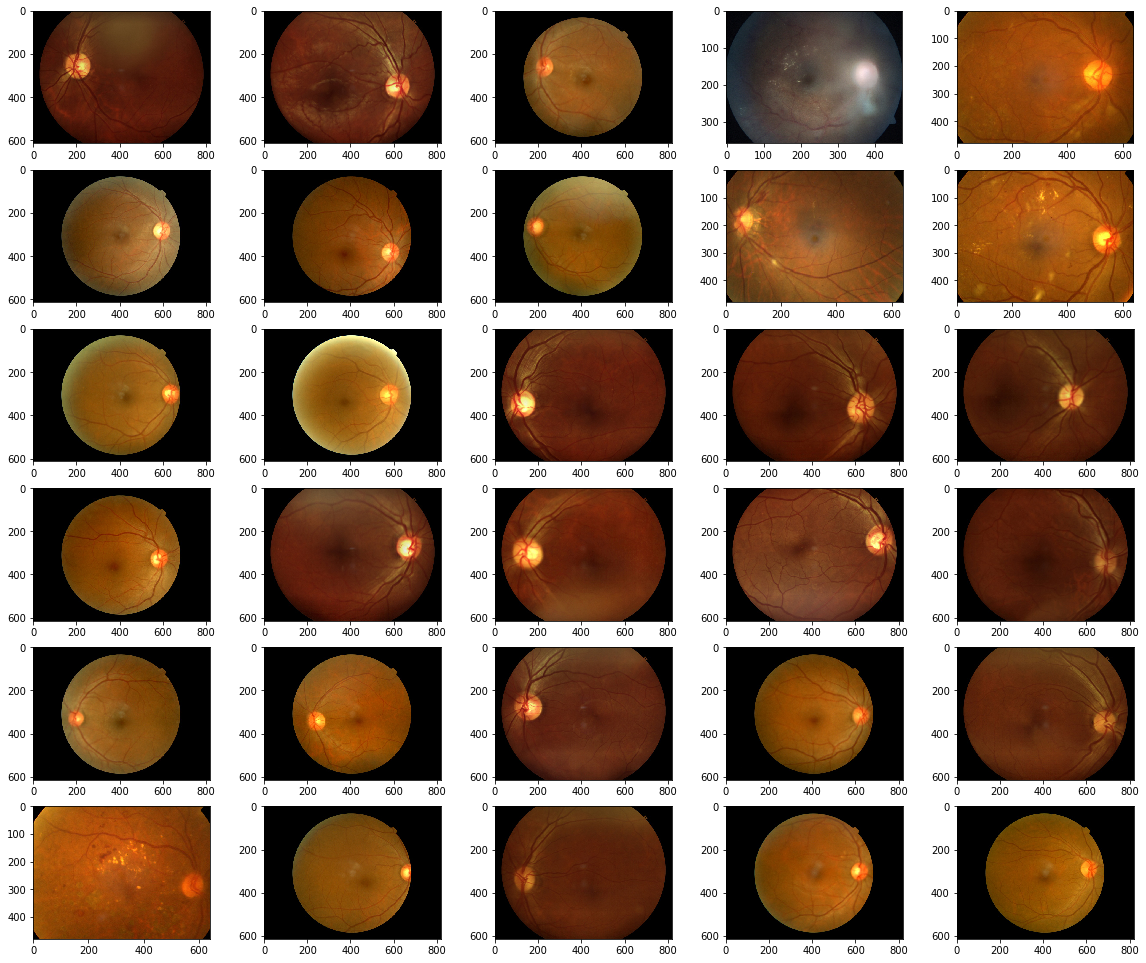

In [30]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(train_image_small):
    plt.subplot(len(train_image_small) / columns + 1, columns, i + 1)
    plt.imshow(image)

## train images (large size)

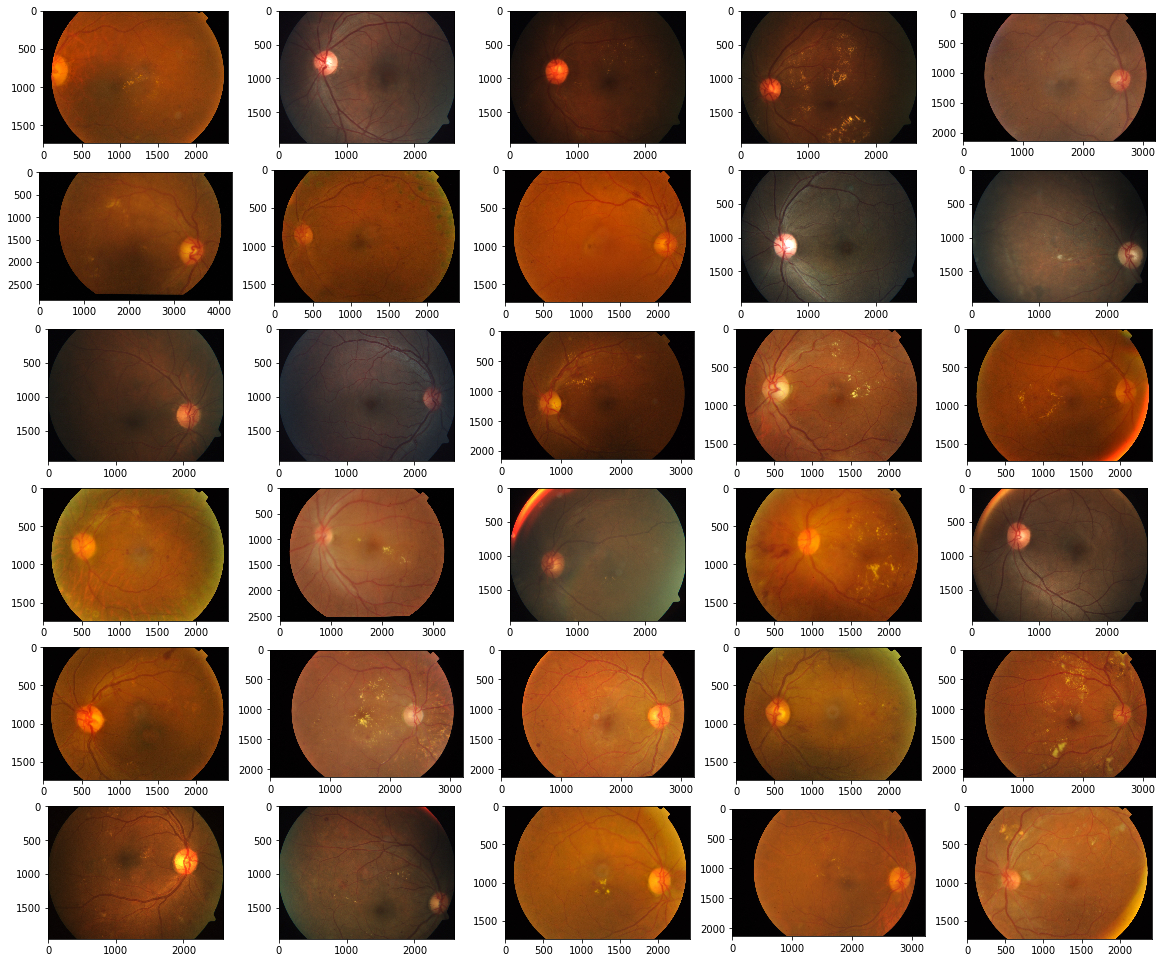

In [31]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(train_image_large):
    plt.subplot(len(train_image_large) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Conclusion

+ by looking into the dataset, we can clearly see the difference between the train and test dataset
+ hopefully this simple eda explains the large gap between the cv score and lb score
+ and it will be your job to make stable cross validation